In [1]:
# Download dataset

# NOTE: this url may be temporary, the current long term storage is on Kaggle: https://www.kaggle.com/datasets/pelmers/github-repository-metadata-with-5-stars
DATA_URL = 'https://file2.pelmers.com/repo_metadata.json'
DATA_PATH = 'repo_metadata.json'

import os, sys, subprocess

# Define function x that given a command string, runs it with subprocess and streams the output
def x(cmd):
    p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    buf = getattr(sys.stdout, 'buffer', sys.stdout)
    for c in iter(lambda: p.stdout.read(1), b""):
        # of course this won't work if the byte is not printable but we'll ignore that for now
        buf.write(c.decode('utf-8', 'ignore'))
    retval = p.wait()
    return retval

if not os.path.exists(DATA_PATH):
    print('Downloading dataset...')
    x(f'curl -O {DATA_URL}')
    print(f'Datset downloaded to {DATA_PATH}')

In [2]:
# Import data with pandas

import pandas as pd

compression = None if DATA_PATH.endswith('.json') else 'infer'
df = pd.read_json(DATA_PATH, compression=compression)

print("Data loaded from {}.".format(DATA_PATH))

Data loaded from repo_metadata.json.


In [3]:
# Print data column names, number of rows, and example row

print(f"Data columns: {df.columns}")
print(f"Number of rows: {len(df)}")
print(f"First row:\n{df.head(1)}")

Data columns: Index(['owner', 'name', 'stars', 'forks', 'watchers', 'isFork', 'isArchived',
       'languages', 'languageCount', 'topics', 'topicCount', 'diskUsageKb',
       'pullRequests', 'issues', 'description', 'primaryLanguage', 'createdAt',
       'pushedAt', 'defaultBranchCommitCount', 'license',
       'assignableUserCount', 'codeOfConduct', 'forkingAllowed',
       'nameWithOwner', 'parent'],
      dtype='object')
Number of rows: 3152515
First row:
          owner          name   stars  forks  watchers  isFork  isArchived  \
0  freeCodeCamp  freeCodeCamp  366663  32096      8444   False       False   

                                           languages  languageCount  \
0  [{'name': 'TypeScript', 'size': 1324842}, {'na...              8   

                                              topics  ...  primaryLanguage  \
0  [{'name': 'learn-to-code', 'stars': 363}, {'na...  ...       TypeScript   

              createdAt              pushedAt  defaultBranchCommitCount  \
0  20

<Axes: title={'center': 'Top 10 languages'}, xlabel='primaryLanguage', ylabel='Number of repositories'>

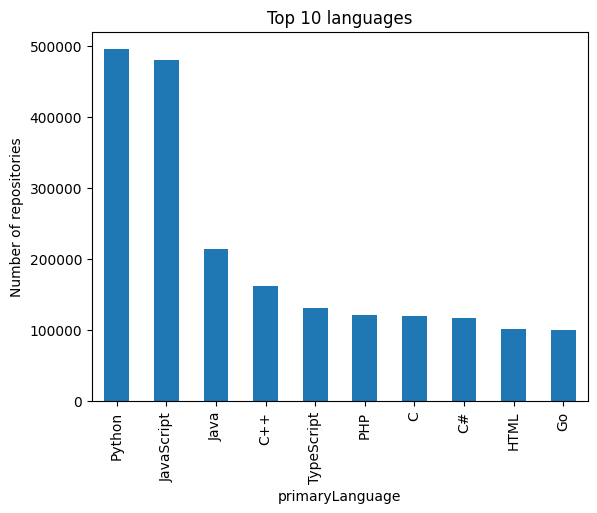

In [4]:
import matplotlib.pyplot as plt

# Group by 'primaryLanguage' and show a bar graph of the top 10 languages, make sure the bar chart has a title and axis labels
plt.title('Top 10 languages')
plt.ylabel('Number of repositories')
df.groupby('primaryLanguage').size().sort_values(ascending=False).head(10).plot.bar()

In [5]:
# Top 10 entries by stars
df.sort_values(by='stars', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,languageCount,topics,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
0,freeCodeCamp,freeCodeCamp,366663,32096,8444,False,False,"[{'name': 'TypeScript', 'size': 1324842}, {'na...",8,"[{'name': 'learn-to-code', 'stars': 363}, {'na...",...,TypeScript,2014-12-24T17:49:19Z,2023-05-16T20:11:34Z,33037.0,"BSD 3-Clause ""New"" or ""Revised"" License",46,Other,True,freeCodeCamp/freeCodeCamp,NaN
1,EbookFoundation,free-programming-books,279431,55158,9667,False,False,[],0,"[{'name': 'education', 'stars': 512}, {'name':...",...,None,2013-10-11T06:50:37Z,2023-05-16T08:06:17Z,8341.0,Creative Commons Attribution 4.0 International,13,Contributor Covenant,True,EbookFoundation/free-programming-books,NaN
2,996icu,996.ICU,265805,21416,4261,False,False,[],0,[],...,None,2019-03-26T07:31:14Z,2023-04-25T02:23:39Z,3189.0,Other,2,None,True,996icu/996.ICU,NaN
3,jwasham,coding-interview-university,257574,67658,8597,False,False,[],0,"[{'name': 'computer-science', 'stars': 455}, {...",...,None,2016-06-06T02:34:12Z,2023-05-15T19:01:50Z,2359.0,Creative Commons Attribution Share Alike 4.0 I...,1,None,True,jwasham/coding-interview-university,NaN
4,sindresorhus,awesome,254146,25778,7516,False,False,[],0,"[{'name': 'awesome', 'stars': 63398}, {'name':...",...,None,2014-07-11T13:42:37Z,2023-05-14T15:35:37Z,1089.0,Creative Commons Zero v1.0 Universal,1,Contributor Covenant,True,sindresorhus/awesome,NaN
5,public-apis,public-apis,239695,27343,3852,False,False,"[{'name': 'Python', 'size': 40479}, {'name': '...",2,"[{'name': 'api', 'stars': 79942}, {'name': 'pu...",...,Python,2016-03-20T23:49:42Z,2023-05-15T10:57:58Z,4527.0,MIT License,13,None,True,public-apis/public-apis,NaN
6,kamranahmedse,developer-roadmap,239603,33893,6846,False,False,"[{'name': 'TypeScript', 'size': 109045}, {'nam...",4,"[{'name': 'computer-science', 'stars': 455}, {...",...,TypeScript,2017-03-15T13:45:52Z,2023-05-16T15:43:08Z,3185.0,Other,2,Contributor Covenant,True,kamranahmedse/developer-roadmap,NaN
7,donnemartin,system-design-primer,220197,39109,6475,False,False,"[{'name': 'Python', 'size': 57260}, {'name': '...",2,"[{'name': 'programming', 'stars': 1716}, {'nam...",...,Python,2017-02-26T16:15:28Z,2023-05-10T21:18:56Z,329.0,Other,1,None,True,donnemartin/system-design-primer,NaN
8,facebook,react,207485,43291,6630,False,False,"[{'name': 'JavaScript', 'size': 4135889}, {'na...",10,"[{'name': 'javascript', 'stars': 155401}, {'na...",...,JavaScript,2013-05-24T16:15:54Z,2023-05-16T20:05:31Z,15808.0,MIT License,169,Contributor Covenant,True,facebook/react,NaN
9,vuejs,vue,203597,33717,5996,False,False,"[{'name': 'TypeScript', 'size': 1843676}, {'na...",5,"[{'name': 'vue', 'stars': 56398}, {'name': 'ja...",...,TypeScript,2013-07-29T03:24:51Z,2023-05-04T02:29:52Z,3547.0,MIT License,63,Contributor Covenant,True,vuejs/vue,NaN


In [6]:
# Top 10 biggest repos by diskUsageKb
df.sort_values(by='diskUsageKb', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,languageCount,topics,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
73162,rozierguillaume,covid-19,310,35,20,False,False,"[{'name': 'HTML', 'size': 1381973907}, {'name'...",4,[],...,HTML,2020-03-15T13:25:00Z,2021-09-27T18:01:39Z,6000.0,MIT License,1,None,True,rozierguillaume/covid-19,NaN
1209880,TWLBot,Builds-archive,28,2,3,False,True,[],0,[],...,None,2019-02-03T23:00:26Z,2021-03-10T05:43:19Z,3619.0,None,2,None,True,TWLBot/Builds-archive,NaN
1579012,NagatoDEV,PlayStation-Home-Master-Archive,17,13,7,False,False,[],0,"[{'name': 'ps3', 'stars': 13}, {'name': 'prese...",...,None,2020-11-18T11:37:11Z,2022-06-23T09:06:00Z,1471.0,None,7,None,True,NagatoDEV/PlayStation-Home-Master-Archive,NaN
444890,carranco-sga,Mexico-COVID-19,70,42,16,False,True,"[{'name': 'Julia', 'size': 22614}]",1,"[{'name': 'covid-19', 'stars': 14318}, {'name'...",...,Julia,2020-03-15T23:52:12Z,2022-03-15T00:28:04Z,5657.0,MIT License,1,None,True,carranco-sga/Mexico-COVID-19,NaN
2114355,TWLBot,Builds-archive-2,12,0,3,False,True,[],0,[],...,None,2021-03-10T05:34:26Z,2022-03-13T04:49:16Z,1899.0,None,2,None,True,TWLBot/Builds-archive-2,NaN
2527905,sportsdataverse,hoopR-data,7,4,3,False,False,[],0,[],...,None,2021-05-17T03:16:31Z,2023-04-05T18:37:27Z,2057.0,None,2,None,True,sportsdataverse/hoopR-data,NaN
64965,covid19india,api,668,625,43,False,True,"[{'name': 'Python', 'size': 93290}, {'name': '...",3,"[{'name': 'india', 'stars': 8}, {'name': 'data...",...,Python,2020-03-21T05:05:50Z,2021-09-09T07:25:38Z,3060.0,MIT License,9,None,True,covid19india/api,NaN
2864082,The-Unstable-World-backup,binary,5,0,1,False,True,[],0,"[{'name': 'minetest', 'stars': 27}, {'name': '...",...,None,2019-11-29T15:53:23Z,2020-03-08T14:45:27Z,8698.0,None,1,None,True,The-Unstable-World-backup/binary,NaN
1395550,DavHau,nix-pypi-fetcher,13,5,4,False,False,"[{'name': 'Python', 'size': 7902}, {'name': 'N...",2,[],...,Python,2020-02-09T14:17:56Z,2022-11-27T17:12:10Z,1815.0,MIT License,1,None,True,DavHau/nix-pypi-fetcher,NaN
597489,lopezbec,COVID19_Tweets_Dataset,46,56,4,False,False,"[{'name': 'HTML', 'size': 30303829}, {'name': ...",3,[],...,HTML,2021-07-15T14:33:13Z,2023-05-05T13:55:02Z,1237.0,None,1,None,True,lopezbec/COVID19_Tweets_Dataset,NaN


In [7]:
# Top 10 by assignableUserCount
df.sort_values(by='assignableUserCount', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,languageCount,topics,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
2409819,learn-co-students,javascript-intro-to-functions-lab-bootcamp-pre...,7,6803,18,False,False,"[{'name': 'JavaScript', 'size': 2094}, {'name'...",2,[],...,JavaScript,2016-08-22T22:33:52Z,2021-06-12T21:07:39Z,50.0,Other,3186,None,True,learn-co-students/javascript-intro-to-function...,NaN
1833881,learn-co-students,js-from-dom-to-node-bootcamp-prep-000,9,6859,20,False,False,"[{'name': 'JavaScript', 'size': 245}]",1,[],...,JavaScript,2017-04-24T18:46:41Z,2022-11-01T15:10:21Z,27.0,Other,2829,None,True,learn-co-students/js-from-dom-to-node-bootcamp...,NaN
50,microsoft,PowerToys,90577,5264,1105,False,False,"[{'name': 'C#', 'size': 4193274}, {'name': 'C+...",8,"[{'name': 'powertoys', 'stars': 56}, {'name': ...",...,C#,2019-05-01T17:44:02Z,2023-05-16T17:52:14Z,6593.0,MIT License,2405,Other,True,microsoft/PowerToys,NaN
18650,microsoft,code-with-engineering-playbook,1691,481,2307,False,False,"[{'name': 'Dockerfile', 'size': 1527}, {'name'...",2,[],...,Dockerfile,2018-07-30T12:49:10Z,2023-05-15T18:00:32Z,495.0,Creative Commons Attribution 4.0 International,2401,Other,True,microsoft/code-with-engineering-playbook,NaN
73328,microsoft,AzureStorageExplorer,309,89,39,False,False,[],0,"[{'name': 'azure-storage', 'stars': 11}]",...,None,2018-03-09T21:53:14Z,2023-05-10T21:50:15Z,38.0,Creative Commons Attribution 4.0 International,2395,Other,True,microsoft/AzureStorageExplorer,NaN
113199,microsoft,vscode-azurefunctions,262,130,36,False,False,"[{'name': 'TypeScript', 'size': 1224332}, {'na...",4,"[{'name': 'vscode', 'stars': 235}, {'name': 'a...",...,TypeScript,2017-09-21T21:28:44Z,2023-05-15T23:37:20Z,1331.0,MIT License,2384,Other,True,microsoft/vscode-azurefunctions,NaN
7423,microsoft,CBL-Mariner,3647,404,123,False,False,"[{'name': 'RPM Spec', 'size': 27435476}, {'nam...",26,[],...,RPM Spec,2020-07-22T19:27:14Z,2023-05-16T22:17:32Z,3820.0,MIT License,2376,Other,True,microsoft/CBL-Mariner,NaN
34886,microsoft,WhatTheHack,1482,747,61,False,False,"[{'name': 'HTML', 'size': 2419664}, {'name': '...",24,[],...,HTML,2018-09-17T10:13:08Z,2023-05-16T19:58:27Z,5403.0,MIT License,2375,Other,True,microsoft/WhatTheHack,NaN
38522,microsoft,vstest,774,278,82,False,False,"[{'name': 'C#', 'size': 12262686}, {'name': 'P...",12,"[{'name': 'visual-studio', 'stars': 233}, {'na...",...,C#,2016-07-07T04:18:58Z,2023-05-16T22:31:43Z,2563.0,MIT License,2372,Other,True,microsoft/vstest,NaN
3858,microsoft,winget-pkgs,6863,3094,100,False,False,"[{'name': 'PowerShell', 'size': 168307}]",1,"[{'name': 'hacktoberfest', 'stars': 24393}]",...,PowerShell,2019-07-16T22:21:48Z,2023-05-16T22:20:35Z,94261.0,MIT License,2371,Other,True,microsoft/winget-pkgs,NaN


In [8]:
# Total diskUsageKb of all repos in terabytes?
print(f"Total disk usage of all repos: {df['diskUsageKb'].sum() / 1024 / 1024 / 1024} TB")

Total disk usage of all repos: 76.82429098896682 TB


In [9]:
# Top 10 number of commits
df.sort_values(by='defaultBranchCommitCount', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,languageCount,topics,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
1578848,FormerlyChucks,IThinkImOKAY,17,9,0,False,False,"[{'name': 'Python', 'size': 4302}, {'name': 'C...",4,[],...,Python,2020-10-06T19:36:33Z,2021-08-31T23:55:52Z,4314502.0,None,1,None,True,FormerlyChucks/IThinkImOKAY,NaN
453106,virejdasani,Commited,72,13,1,False,True,"[{'name': 'Python', 'size': 906}]",1,"[{'name': 'commit', 'stars': 11}, {'name': 'wo...",...,Python,2021-02-12T14:26:07Z,2021-07-08T05:20:32Z,3000007.0,None,1,None,True,virejdasani/Commited,NaN
2658673,Helikopter-Bojowy,Exp-na-helikopterze,8,4,3,False,False,[],0,[],...,None,2021-03-27T12:38:30Z,2023-05-21T05:59:12Z,2346880.0,None,2,None,True,Helikopter-Bojowy/Exp-na-helikopterze,NaN
525919,proxylist-to,proxy-list,29,10,2,False,False,[],0,"[{'name': 'free', 'stars': 129}, {'name': 'pro...",...,None,2022-09-10T20:11:11Z,2022-12-05T18:18:29Z,2030023.0,None,1,None,True,proxylist-to/proxy-list,NaN
467425,cirosantilli,test-many-commits-1m,77,27,6,False,False,[],0,[],...,None,2016-05-18T10:03:28Z,2020-10-01T21:19:24Z,2000000.0,None,1,None,True,cirosantilli/test-many-commits-1m,NaN
995228,19h,heartbeat,17,35,3,False,False,[],0,[],...,None,2014-07-04T00:46:43Z,2022-04-24T01:16:42Z,1683892.0,None,1,None,True,19h/heartbeat,NaN
995225,19h,heartbeat,17,35,3,False,False,[],0,[],...,None,2014-07-04T00:46:43Z,2022-04-24T01:16:42Z,1683892.0,None,1,None,True,19h/heartbeat,NaN
2090018,moiify,AutoGreen,12,12,3,False,False,"[{'name': 'Batchfile', 'size': 200}, {'name': ...",2,[],...,Batchfile,2019-01-08T02:38:23Z,2023-03-11T16:05:04Z,1550908.0,None,1,None,True,moiify/AutoGreen,NaN
893080,SUSE,kernel,40,12,10,False,False,"[{'name': 'C', 'size': 1200862212}, {'name': '...",21,[],...,C,2020-01-31T17:02:02Z,2023-05-18T09:10:57Z,1267974.0,Other,11,None,True,SUSE/kernel,NaN
264435,openSUSE,kernel,155,79,25,False,False,"[{'name': 'C', 'size': 1200862212}, {'name': '...",21,[],...,C,2014-12-01T10:25:28Z,2023-05-17T09:12:19Z,1267974.0,Other,29,None,True,openSUSE/kernel,NaN


In [10]:
from tqdm import tqdm

language = 'Java'

# Dataframe of all repos with MIT, BSD, or Apache 2.0 license
lang_df = df[((df['license'] == 'MIT License') | (df['license'] == 'BSD 3-Clause "New" or "Revised" License') | (df['license'] == 'Apache License 2.0')) & (df['pullRequests'] >= 20) & (df['primaryLanguage'] == language) &
             (df['pushedAt'] > '2022-01-01') & (df['assignableUserCount'] >= 5) & (df['defaultBranchCommitCount'] >= 100) ]

df_indices = []
for index, row in tqdm(lang_df.iterrows(), total=len(lang_df)):
    for lang in row['languages']:
        if lang['name'] == language and lang['size'] >= 100000:
            df_indices.append((lang['size'], index))
            break

lang_df = lang_df.loc[[index for size, index in df_indices]]
print(f"Number of {language} repos with MIT license, 20+ pull requests, pushed in the last year, 5+ assignable users, 100+ commits and >= 100kb of {language} code: {len(lang_df)}")

# print top 10 sorted by watchers count
lang_df.sort_values(by='watchers', ascending=False).head(10)

100%|██████████| 5042/5042 [00:00<00:00, 21017.92it/s]

Number of Java repos with MIT license, 20+ pull requests, pushed in the last year, 5+ assignable users, 100+ commits and >= 100kb of Java code: 4326


,owner,name,stars,forks,watchers,isFork,isArchived,languages,languageCount,topics,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
34,facebook,react-native,109563,23264,3651,False,False,"[{'name': 'Java', 'size': 3979547}, {'name': '...",14,"[{'name': 'android', 'stars': 128570}, {'name'...",...,Java,2015-01-09T18:10:16Z,2023-05-16T21:59:08Z,27618.0,MIT License,291,Contributor Covenant,True,facebook/react-native,NaN
88,spring-projects,spring-boot,67251,38621,3380,False,False,"[{'name': 'Java', 'size': 22996276}, {'name': ...",13,"[{'name': 'java', 'stars': 140497}, {'name': '...",...,Java,2012-10-19T15:02:57Z,2023-05-16T21:04:57Z,42763.0,Apache License 2.0,14,Contributor Covenant,True,spring-projects/spring-boot,NaN
160,spring-projects,spring-framework,51806,36141,3374,False,False,"[{'name': 'Java', 'size': 44191417}, {'name': ...",15,"[{'name': 'framework', 'stars': 29142}, {'name...",...,Java,2010-12-08T04:04:45Z,2023-05-16T15:36:31Z,26654.0,Apache License 2.0,14,Contributor Covenant,True,spring-projects/spring-framework,NaN
280,apache,dubbo,38883,25900,3079,False,False,"[{'name': 'Java', 'size': 15241306}, {'name': ...",7,"[{'name': 'dubbo', 'stars': 44}, {'name': 'dis...",...,Java,2012-06-19T07:56:02Z,2023-05-16T15:27:26Z,6735.0,Apache License 2.0,67,Contributor Covenant,True,apache/dubbo,NaN
215677,uber,rides-java-sdk,98,57,2579,False,False,"[{'name': 'Java', 'size': 288113}, {'name': 'S...",3,[],...,Java,2015-09-18T19:20:11Z,2023-05-08T23:40:56Z,138.0,MIT License,74,Contributor Covenant,True,uber/rides-java-sdk,NaN
239787,uber,tchannel-java,134,67,2559,False,False,"[{'name': 'Java', 'size': 736969}, {'name': 'T...",5,[],...,Java,2015-07-27T08:49:33Z,2023-03-19T22:47:19Z,651.0,MIT License,83,Contributor Covenant,True,uber/tchannel-java,NaN
146418,uber-archive,phabricator-jenkins-plugin,367,101,2545,False,False,"[{'name': 'Java', 'size': 371119}, {'name': 'H...",2,[],...,Java,2015-04-07T20:50:58Z,2023-01-24T15:14:22Z,483.0,MIT License,22,None,True,uber-archive/phabricator-jenkins-plugin,NaN
122177,uber,rides-android-sdk,283,124,2521,False,False,"[{'name': 'Java', 'size': 461266}, {'name': 'S...",3,[],...,Java,2015-11-18T21:43:03Z,2023-05-10T06:06:42Z,203.0,MIT License,79,Contributor Covenant,True,uber/rides-android-sdk,NaN
122166,uber,rides-android-sdk,283,124,2521,False,False,"[{'name': 'Java', 'size': 461266}, {'name': 'S...",3,[],...,Java,2015-11-18T21:43:03Z,2023-05-10T06:06:42Z,203.0,MIT License,79,Contributor Covenant,True,uber/rides-android-sdk,NaN
187,google,guava,47472,10539,2430,False,False,"[{'name': 'Java', 'size': 26326072}, {'name': ...",4,"[{'name': 'guava', 'stars': 9}, {'name': 'java...",...,Java,2014-05-29T16:23:17Z,2023-05-16T21:52:14Z,6055.0,Apache License 2.0,14,Other,True,google/guava,NaN


In [11]:
# Updated h-index scores: https://danvdk.medium.com/github-stars-and-the-h-index-a-journey-c104cfe37da6

from collections import defaultdict

# Group df by 'owner' and aggregate a list of star counts for each author's repositories using pandas
star_counts_by_author = df.groupby('owner').agg({'stars': lambda x: list(x)})['stars'].to_dict()


# print the top 10 authors by total star count
top_authors = sorted(star_counts_by_author.items(), key=lambda x: sum(x[1]), reverse=True)[:10]
print("Top 10 authors by total star count:")
for author, star_counts in top_authors:
    print(f"{author}: {sum(star_counts)}")

# compute the g-index for each author
# g-index of an author is the maximum number g of repositories with at least g stars each
g_index_by_author = {
    author: max([
        g if len([stars for stars in star_counts if stars >= g]) >= g else 0
        for g in range(1, len(star_counts) + 1)
    ])
    for author, star_counts in tqdm(star_counts_by_author.items())
}

# print the top 10 g-index scores, one on each line
print("Top 10 authors by g-index (g repos with at least g stars):")
for author, g_index in sorted(g_index_by_author.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{author}: {g_index}")

Top 10 authors by total star count:
microsoft: 2073628
google: 1645351
apache: 878409
facebook: 853729
sindresorhus: 705548
alibaba: 667899
vuejs: 566812
facebookresearch: 526145
tensorflow: 441221
github: 435360


100%|██████████| 1103308/1103308 [00:06<00:00, 163820.96it/s]


Top 10 authors by g-index (g repos with at least g stars):
microsoft: 470
google: 440
apache: 265
sindresorhus: 243
facebookresearch: 239
fossasia: 210
alibaba: 187
spatie: 187
Azure: 184
facebookarchive: 167


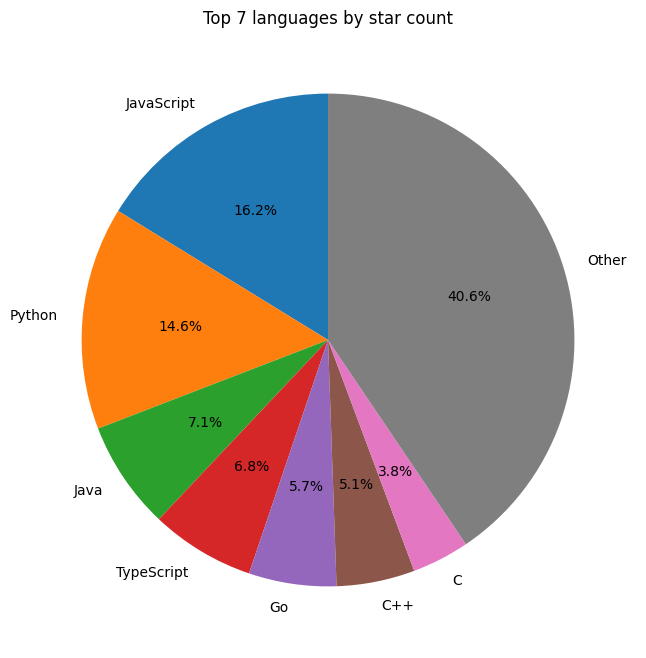

In [12]:
# Plot relative sizes of top 7 languages
top_languages = df.groupby('primaryLanguage').agg({'stars': 'sum'}).sort_values(by='stars', ascending=False).head(7).index
# get the total star count for all other languages
other_stars = df[~df['primaryLanguage'].isin(top_languages)].agg({'stars': 'sum'})['stars']
# make a list of tuples of (language, star count)
star_counts = [(lang, df[df['primaryLanguage'] == lang].agg({'stars': 'sum'})['stars']) for lang in top_languages]
star_counts.append(('Other', other_stars))

# make the pie chart
plt.figure(figsize=(8, 8))
plt.pie([star_count for lang, star_count in star_counts], labels=[lang for lang, star_count in star_counts], autopct='%1.1f%%', startangle=90)
plt.title('Top 7 languages by star count')
plt.show()

In [13]:
# What is my g-index?
g_index_by_author['pelmers']

5

In [14]:
# Print owner/name of top 10 by issue count
df.sort_values(by='issues', ascending=False).head(10)[['owner', 'name', 'issues', 'pullRequests']]

,owner,name,issues,pullRequests
22,microsoft,vscode,156136,21189
64729,webcompat,web-bugs,121718,15
29577,ron190,jsql-injection,95338,10
19,flutter,flutter,82228,43976
2282643,ZeroK-RTS,CrashReports,67578,0
155,python,cpython,63236,40725
750,llvm,llvm-project,61746,293
195201,department-of-veterans-affairs,va.gov-team,56361,1555
33,golang,go,55943,2979
2308,dotnet,runtime,54965,29241


In [15]:
# Print owner/name of top 10 by pull request count
df.sort_values(by='pullRequests', ascending=False).head(10)[['owner', 'name', 'issues', 'pullRequests']]

,owner,name,issues,pullRequests
2966120,WolseyBankWitness,rediffusion,1,644206
2251,NixOS,nixpkgs,30476,200697
184363,everypolitician,everypolitician-data,964,164990
729,Homebrew,homebrew-cask,6225,140819
2167,Homebrew,homebrew-core,5101,125821
3858,microsoft,winget-pkgs,2379,104231
1264,odoo,odoo,16246,103572
855,elastic,kibana,54546,103026
52063,JuliaRegistries,General,141,83574
2829256,test-organization-kkjeer,app-test,46724,80522


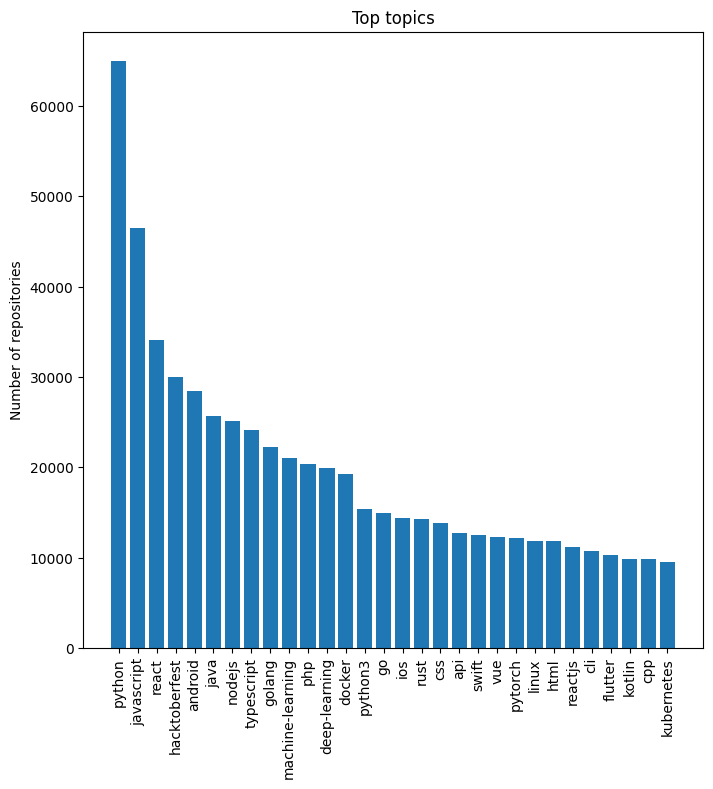

: 

In [16]:
# Find the frequency of every topic
from collections import Counter
topic_counts = Counter()
for topics in df['topics']:
    for topic in topics:
        topic_counts[topic['name']] += 1
# Make bar chart
plt.figure(figsize=(8, 8))
plt.bar([topic for topic, count in topic_counts.most_common(30)], [count for topic, count in topic_counts.most_common(30)])
plt.xticks(rotation=90)
plt.title('Top topics')
plt.ylabel('Number of repositories')
plt.show()